In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Import requests library
import requests

#import the API key
from config import weather_api_key

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)

#pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs = zip(lats, lngs)
lat_lngs 

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

880

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd069afc625f7308f2e35856c0b2b4d0


In [23]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 41.32,
  'feels_like': 27.57,
  'temp_min': 37.99,
  'temp_max': 45,
  'pressure': 1020,
  'humidity': 24},
 'visibility': 16093,
 'wind': {'speed': 13.87, 'deg': 250},
 'clouds': {'all': 20},
 'dt': 1582392136,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1582371094,
  'sunset': 1582410262},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [24]:
# Get the JSON data.
boston_data = city_weather.json()

In [25]:
#get the sys specifc dictionary data 
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1582371094,
 'sunset': 1582410262}

In [26]:
#Add country in brackets 
boston_data["sys"]["country"]

'US'

In [27]:
#get the date in the weather data
boston_data['dt']

1582392136

In [28]:
#get some more data 
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 45 24 20 13.87


In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | metu
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | luganville
Processing Record 16 of Set 1 | apeldoorn
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ostersund
Processing Record 20 of Set 1 | darhan
Processing Record 21 of Set 1 | tiarei
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of

Processing Record 33 of Set 4 | syumsi
Processing Record 34 of Set 4 | albanel
Processing Record 35 of Set 4 | itarema
Processing Record 36 of Set 4 | arica
Processing Record 37 of Set 4 | wasilla
Processing Record 38 of Set 4 | chimbarongo
Processing Record 39 of Set 4 | vila
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | kuche
City not found. Skipping...
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | almaty
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | sterling
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | ayorou
Processing Record 49 of Set 4 | jacmel
Processing Record 50 of Set 4 | cookeville
Processing Record 1 of Set 5 | karpathos
Processing Record 2 of Set 5 | asyut
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | port augusta
Processing Record 5 of Set 5 | meulaboh
Processing Re

Processing Record 20 of Set 8 | kesennuma
City not found. Skipping...
Processing Record 21 of Set 8 | estrela
Processing Record 22 of Set 8 | linchuan
City not found. Skipping...
Processing Record 23 of Set 8 | lasa
Processing Record 24 of Set 8 | ginir
Processing Record 25 of Set 8 | mazatlan
Processing Record 26 of Set 8 | jacareacanga
Processing Record 27 of Set 8 | kavaratti
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | esperance
Processing Record 30 of Set 8 | balabac
Processing Record 31 of Set 8 | codajas
Processing Record 32 of Set 8 | sosnovo-ozerskoye
Processing Record 33 of Set 8 | kaiwaka
Processing Record 34 of Set 8 | ambulu
Processing Record 35 of Set 8 | yar-sale
Processing Record 36 of Set 8 | rockport
Processing Record 37 of Set 8 | andenes
Processing Record 38 of Set 8 | thunder bay
Processing Record 39 of Set 8 | puquio
Processing Record 40 of Set 8 | mayskiy
Processing Record 41 of Set 8 | palana
Processing Record 42 of Set 8 | port-cartier
P

Processing Record 7 of Set 12 | gat
Processing Record 8 of Set 12 | lujan
Processing Record 9 of Set 12 | pacific grove
Processing Record 10 of Set 12 | west odessa
Processing Record 11 of Set 12 | kenosha
Processing Record 12 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 13 of Set 12 | krasnoselkup
Processing Record 14 of Set 12 | vanimo
Processing Record 15 of Set 12 | anamur
Processing Record 16 of Set 12 | amot
Processing Record 17 of Set 12 | koboldo
City not found. Skipping...
Processing Record 18 of Set 12 | dembi dolo
Processing Record 19 of Set 12 | svetlogorsk
Processing Record 20 of Set 12 | barao de melgaco
Processing Record 21 of Set 12 | khammam
Processing Record 22 of Set 12 | gamba
Processing Record 23 of Set 12 | nguiu
City not found. Skipping...
Processing Record 24 of Set 12 | dunedin
Processing Record 25 of Set 12 | bongandanga
Processing Record 26 of Set 12 | candawaga
City not found. Skipping...
Processing Record 27 of Set 12 | kingsland
Pr

Processing Record 43 of Set 15 | jolalpan
Processing Record 44 of Set 15 | kailua
Processing Record 45 of Set 15 | coronado
Processing Record 46 of Set 15 | ngunguru
Processing Record 47 of Set 15 | soskovo
Processing Record 48 of Set 15 | adolfo lopez mateos
Processing Record 49 of Set 15 | camana
Processing Record 50 of Set 15 | fort-shevchenko
Processing Record 1 of Set 16 | mackay
Processing Record 2 of Set 16 | nouakchott
Processing Record 3 of Set 16 | tamale
Processing Record 4 of Set 16 | dalvik
Processing Record 5 of Set 16 | christchurch
Processing Record 6 of Set 16 | coihaique
Processing Record 7 of Set 16 | bahar
Processing Record 8 of Set 16 | novoselytsya
Processing Record 9 of Set 16 | wuwei
Processing Record 10 of Set 16 | sao miguel do araguaia
Processing Record 11 of Set 16 | jardim
Processing Record 12 of Set 16 | hanmer springs
Processing Record 13 of Set 16 | puerto baquerizo moreno
Processing Record 14 of Set 16 | skjervoy
Processing Record 15 of Set 16 | neiafu


In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,64.40,59,20,6.46,AR,2020-02-22 17:22:23
1,Kavieng,-2.57,150.80,83.25,74,22,5.75,PG,2020-02-22 17:26:23
2,Isangel,-19.55,169.27,78.15,80,42,14.54,VU,2020-02-22 17:25:28
3,Codrington,-38.27,141.97,60.30,76,0,9.37,AU,2020-02-22 17:25:42
4,Bluff,-46.60,168.33,51.01,77,67,4.00,NZ,2020-02-22 17:24:58
5,Busselton,-33.65,115.33,68.00,63,3,9.40,AU,2020-02-22 17:26:24
6,Metu,8.30,35.58,71.40,54,73,4.94,ET,2020-02-22 17:26:24
7,Albany,42.60,-73.97,41.00,38,20,16.11,US,2020-02-22 17:21:44
8,Mataura,-46.19,168.86,51.01,77,39,4.00,NZ,2020-02-22 17:26:25
9,Yellowknife,62.46,-114.35,0.00,77,75,9.17,CA,2020-02-22 17:24:27


In [31]:
#rearrange the columns
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-02-22 17:22:23,-54.80,-68.30,64.40,59,20,6.46
1,Kavieng,PG,2020-02-22 17:26:23,-2.57,150.80,83.25,74,22,5.75
2,Isangel,VU,2020-02-22 17:25:28,-19.55,169.27,78.15,80,42,14.54
3,Codrington,AU,2020-02-22 17:25:42,-38.27,141.97,60.30,76,0,9.37
4,Bluff,NZ,2020-02-22 17:24:58,-46.60,168.33,51.01,77,67,4.00
5,Busselton,AU,2020-02-22 17:26:24,-33.65,115.33,68.00,63,3,9.40
6,Metu,ET,2020-02-22 17:26:24,8.30,35.58,71.40,54,73,4.94
7,Albany,US,2020-02-22 17:21:44,42.60,-73.97,41.00,38,20,16.11
8,Mataura,NZ,2020-02-22 17:26:25,-46.19,168.86,51.01,77,39,4.00
9,Yellowknife,CA,2020-02-22 17:24:27,62.46,-114.35,0.00,77,75,9.17


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
#import time module 
import time

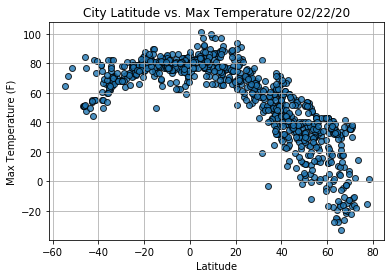

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

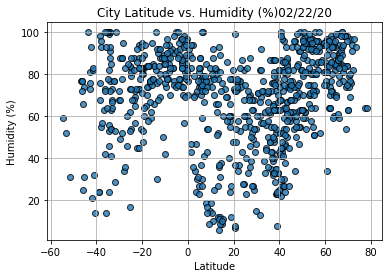

In [42]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

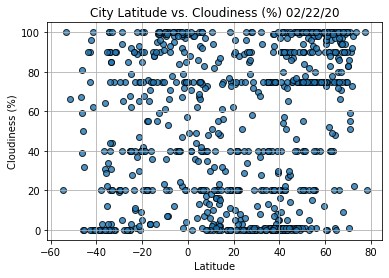

In [43]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

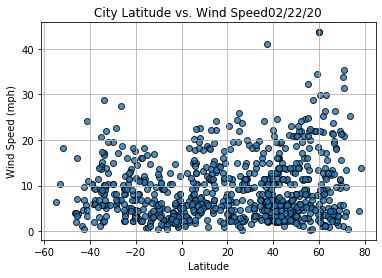

In [44]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [76]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [77]:
#create a new DataFrame for Northern and Southern Hemispheres from the city_data_df. The output will show all the info at index 13 of city_data_df
index13=city_data_df.loc[13]
index13

City                   Luganville
Country                        VU
Date          2020-02-22 17:26:26
Lat                        -15.53
Lng                        167.17
Max Temp                    71.15
Humidity                       95
Cloudiness                     36
Wind Speed                    0.6
Name: 13, dtype: object

In [78]:
#filter dataframe based on row value
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
799    False
800     True
801    False
802    False
803     True
Name: Lat, Length: 804, dtype: bool

In [79]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Metu,ET,2020-02-22 17:26:24,8.30,35.58,71.40,54,73,4.94
7,Albany,US,2020-02-22 17:21:44,42.60,-73.97,41.00,38,20,16.11
9,Yellowknife,CA,2020-02-22 17:24:27,62.46,-114.35,0.00,77,75,9.17
12,Hamilton,US,2020-02-22 17:26:26,39.18,-84.53,44.01,33,1,9.17
14,Apeldoorn,NL,2020-02-22 17:21:57,52.21,5.97,53.01,87,75,21.92


In [80]:
#import linear regression from SciPy stats module
from scipy.stats import linregress


In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

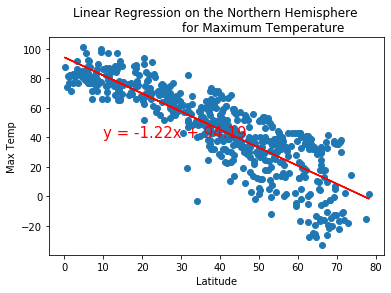

In [82]:
# Linear regression on the Northern Hemisphere for max temp 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature", 'Max Temp',(10,40))

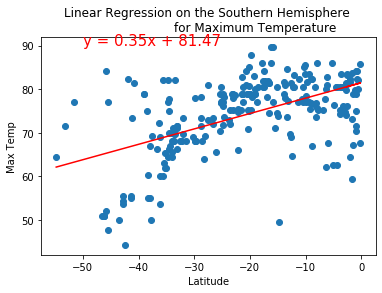

In [83]:
# Linear regression on the Southern Hemisphere for max temp 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

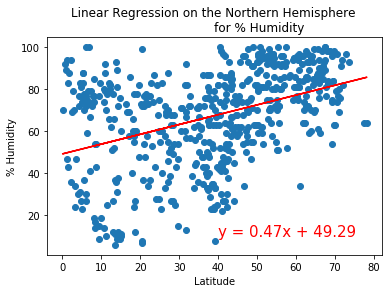

In [84]:
#linear regression on northern hemisphere for humidity
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n\
                       for % Humidity", "% Humidity", (40,10))

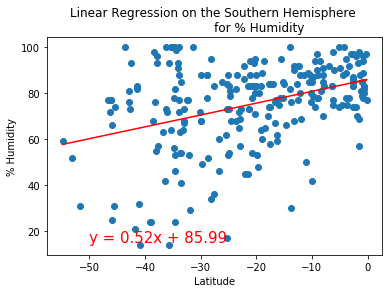

In [85]:
#linear regression on southenr hemisphere for humidity
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n\
                       for % Humidity", "% Humidity", (-50,15))

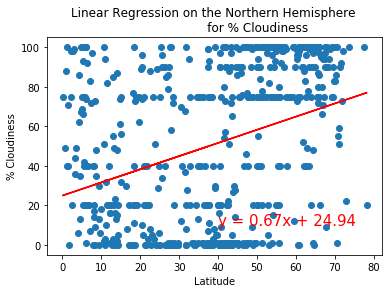

In [86]:
#plot linear regression on northern hemisphere for cloudiness
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n\
                      for % Cloudiness", "% Cloudiness", (40,10))

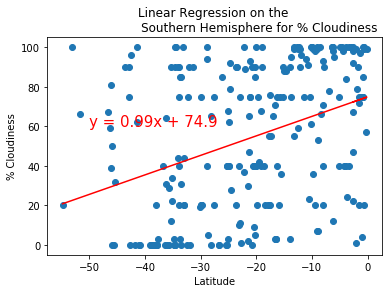

In [89]:
# Linear regression on the Southern Hemisphere for cloudiness 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n\
                       Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

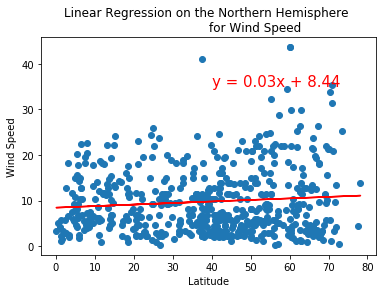

In [90]:
# Linear regression on the Northern Hemisphere for wind speed 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

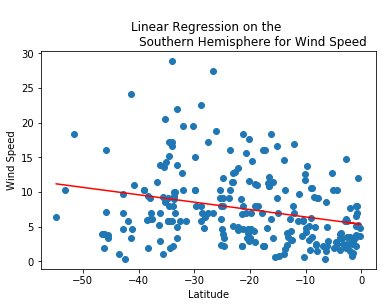

In [93]:
# Linear regression on the Southern Hemisphere for wind speed 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n\
                       Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))